# Requirements

In [1]:
import qpsolvers
from os.path import exists
import pickle

import sn_bayes
from sn_bayes import utils 
from sn_bayes.utils import predict_proba_adjusted
from sn_bayes import longevity_bayes
from sn_bayes.utils import complexity_check
from sn_bayes.utils import get_var_positions
from sn_bayes.utils import get_var_val_positions
from sn_bayes.utils import make_tree
from sn_bayes.utils import bayesInitialize
from sn_bayes.utils import query
from sn_bayes.utils import internal_query
from sn_bayes.utils import internal_query
from sn_bayes.utils import explain_why_bad
from sn_bayes.utils import explain_why_good
from sn_bayes.utils import create_query
from sn_bayes.utils import readable

import sn_service.service_spec.bayesian_pb2
from sn_service.service_spec.bayesian_pb2 import Query
import sn_service.service_spec.bayesian_pb2_grpc as grpc_bayes_grpc
import sn_service.service_spec.bayesian_pb2
from sn_service.service_spec.bayesian_pb2 import BayesianNetworkQuery
from sn_service.service_spec.bayesian_pb2 import QueryId
from sn_service.service_spec.bayesian_pb2 import Id
from sn_bayes.utils import bayesInitialize
from sn_bayes.utils import any_of
from sn_bayes.utils import all_of
from sn_bayes.utils import avg
from sn_bayes.utils import if_then_else
from sn_bayes.utils import bayesInitialize
from sn_bayes.utils import addCpt
from sn_bayes.utils import dependency
from sn_bayes.utils import dependency_direct
from sn_bayes.utils import non_cpt_descriptions

import sn_service.service_spec.bayesian_pb2
from sn_service.service_spec.bayesian_pb2 import BayesianNetwork

import grpc
import pandas as pd
import networkx as nx
import time
import re

import matplotlib.pyplot as plt

In [11]:
bayesianNetwork0 = BayesianNetwork()
cpt = {}
outstr = '' 

In [2]:
discreteDistribution = bayesianNetwork0.discreteDistributions.add()
discreteDistribution.name = "hypertension"
variable = discreteDistribution.variables.add()
variable.name = "hypertension"
variable.probability = 0.50
variable = discreteDistribution.variables.add()
variable.name = "no_hypertension"
variable.probability = 0.50

discreteDistribution = bayesianNetwork0.discreteDistributions.add()
discreteDistribution.name = "disorders_of_lipid_metabolism"
variable = discreteDistribution.variables.add()
variable.name = "disorders_of_lipid_metabolism"
variable.probability = 0.50
variable = discreteDistribution.variables.add()
variable.name = "no_disorders_of_lipid_metabolism"
variable.probability = 0.50

discreteDistribution = bayesianNetwork0.discreteDistributions.add()
discreteDistribution.name = "diabetes"
variable = discreteDistribution.variables.add()
variable.name = "diabetes"
variable.probability = 0.50
variable = discreteDistribution.variables.add()
variable.name = "no_diabetes"
variable.probability = 0.50
#
cpt["metabolic_disease"] = any_of(bayesianNetwork0,cpt,
        {
 'hypertension':{ "hypertension"},
 "disorders_of_lipid_metabolism":{"disorders_of_lipid_metabolism"},
 "diabetes":{"diabetes"}
 },
 ["metabolic_disease","no_metabolic_disease"]

 )
#
cpt["metabolic_syndrome"] = all_of(bayesianNetwork0,cpt,
{
 'hypertension':{ "hypertension"},
 "disorders_of_lipid_metabolism":{"disorders_of_lipid_metabolism"},
 "diabetes":{"diabetes"}
 },
["metabolic_syndrome","no_metabolic_syndrome"]

)
#
outstr = outstr + non_cpt_descriptions(bayesianNetwork0)
outstr = outstr + addCpt(bayesianNetwork0,cpt) 
longevity0 = bayesInitialize(bayesianNetwork0)
longevity0.bake()
bayesianNetwork0


longevity0.probability([
         ['hypertension',
         "disorders_of_lipid_metabolism",
         "diabetes",
    "metabolic_disease",
    "metabolic_syndrome"], ['hypertension',
         "disorders_of_lipid_metabolism",
         "no_diabetes",
    "metabolic_disease",
    "no_metabolic_syndrome"], ['hypertension',
         "no_disorders_of_lipid_metabolism",
         "diabetes",
    "metabolic_disease",
    "no_metabolic_syndrome"], ['hypertension',
         "no_disorders_of_lipid_metabolism",
         "no_diabetes",
    "metabolic_disease",
    "no_metabolic_syndrome"], ['no_hypertension',
         "disorders_of_lipid_metabolism",
         "diabetes",
    "metabolic_disease",
    "no_metabolic_syndrome"], ['no_hypertension',
         "disorders_of_lipid_metabolism",
         "no_diabetes",
    "metabolic_disease",
    "no_metabolic_syndrome"], ['no_hypertension',
         "no_disorders_of_lipid_metabolism",
         "diabetes",
    "metabolic_disease",
    "no_metabolic_syndrome"], ['no_hypertension',
         "no_disorders_of_lipid_metabolism",
         "no_diabetes",
    "no_metabolic_disease",
    "no_metabolic_syndrome"],
])

predict_proba_adjusted(longevity0,bayesianNetwork0)

invars = [({"hypertension":["hypertension"]},{"sensitivity":1.0, "specificity":0.6666})]
outvars = {"disorders_of_lipid_metabolism":0.25,"no_disorders_of_lipid_metabolism":0.75}

In [3]:
cpt_rows,keylist,outvars,description = dependency_direct(bayesianNetwork0, cpt, invars, outvars, priors = None,adjust=False)

start timing...
[({'hypertension': ['hypertension']}, {'sensitivity': 1.0, 'specificity': 0.6666})] ==> {'disorders_of_lipid_metabolism': 0.25, 'no_disorders_of_lipid_metabolism': 0.75} took 0.0176987000000004 seconds


C:\Users\Osvaldo\anaconda3\lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:24: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
C:\Users\Osvaldo\anaconda3\lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:24: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
C:\Users\Osvaldo\anaconda3\lib\site-packages\qpsolvers\conversions\ensure_sparse_matrices.py:24: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


In [4]:
description

'Against the baseline risks, the sensitivity that {0} will be disorders_of_lipid_metabolism for those in the hypertension category of hypertension is 1.0 , and the specificity that {0} will be disorders_of_lipid_metabolism for those in the hypertension category of hypertension is 0.6666.'

In [5]:
outvars

{'disorders_of_lipid_metabolism': 0.25,
 'no_disorders_of_lipid_metabolism': 0.75}

In [6]:
keylist

['hypertension']

In [7]:
cpt_rows

[['hypertension', 'disorders_of_lipid_metabolism', 0.49969181033613896],
 ['hypertension', 'no_disorders_of_lipid_metabolism', 0.500308189663861],
 ['no_hypertension', 'disorders_of_lipid_metabolism', 0.00016581285198614935],
 ['no_hypertension', 'no_disorders_of_lipid_metabolism', 0.9998341871480139]]

In [8]:
var_positions= get_var_positions(bayesianNetwork0)
var_positions

{'hypertension': 0,
 'disorders_of_lipid_metabolism': 1,
 'diabetes': 2,
 'metabolic_disease': 3,
 'metabolic_syndrome': 4}

{'hypertension': [], 'disorders_of_lipid_metabolism': [], 'diabetes': [], 'metabolic_disease': ['hypertension', 'disorders_of_lipid_metabolism', 'diabetes'], 'metabolic_syndrome': ['hypertension', 'disorders_of_lipid_metabolism', 'diabetes']}
[['hypertension', 'disorders_of_lipid_metabolism', 'diabetes'], ['metabolic_disease', 'metabolic_syndrome']]


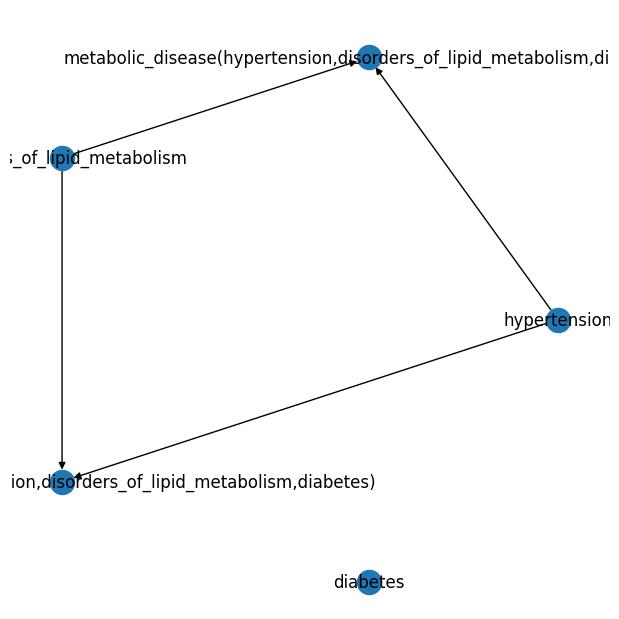

In [9]:
df = make_tree(bayesianNetwork0)
G = nx.DiGraph()
regex = re.compile(r'^([a-z_]*)\(.*')
for index, row in df.iterrows():
    for col in df.columns:
        if row[col] is not None:
            node = row[col][:-1] if col == "level0" else row[col]
            G.add_node(node)           
for node1 in G.nodes:
    for node2 in G.nodes:
        match = regex.match(node1)
        if (node1+',' in node2) or (match is not None and match.group(1)+"," in node2): 
            G.add_edge(node1,node2)
            if match is not None and match.group(1)+"," in node2:
                print (node1)
                print(node2)
                
plt.figure(3,figsize=(6,6)) 
nx.draw_circular(G, with_labels=True)

In [10]:
include_list = ["disorders_of_lipid_metabolism"]